# Import All librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
# read file
cars = pd.read_csv("D:\Code File\Project\Car_F_and_P\Car F and P.csv")
# for preprocessing and machin learning
train, test = train_test_split(cars, test_size=0.2, random_state=3)
# for general view
cars_view = cars.copy()

cars.shape, train.shape, test.shape

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Ernestsalman\AppData\Local\Temp\ipykernel_11440\861711305.py:2: SyntaxWarning: invalid escape sequence '\C'
  cars = pd.read_csv("D:\Code File\Project\Car_F_and_P\Car F and P.csv")


((11914, 16), (9531, 16), (2383, 16))

In [3]:
cars_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
cars_view.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


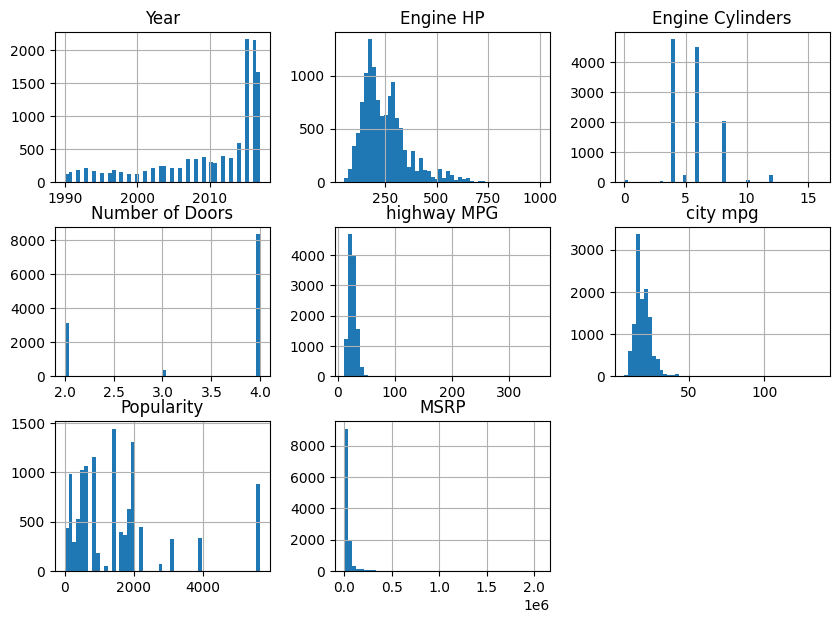

In [6]:
cars_view.hist(bins=50, figsize=(10,7))
plt.show()

In [7]:
cars_view["Make"].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [8]:
# To understand the number of values
cars_view["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [9]:
# To understand the number of values
cars_view["Vehicle Size"].value_counts()

Vehicle Size
Compact    4764
Midsize    4373
Large      2777
Name: count, dtype: int64

In [10]:
# To understand the number of UNKNOWN
cars_view["Transmission Type"].value_counts()

Transmission Type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

# Object missing fix

# Fix Unknown value in Transmision Type column

In [11]:
cars_view[cars_view["Transmission Type"] == "UNKNOWN"].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1289,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,2.0,NaN,Midsize,Coupe,29,19,26,2000
1290,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,4.0,NaN,Midsize,Sedan,29,19,26,2000
4691,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,"Hatchback,Performance",Midsize,2dr Hatchback,23,15,210,6175
4692,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,"Hatchback,Factory Tuner,Performance",Midsize,2dr Hatchback,23,15,210,8548
4693,Pontiac,Firebird,2000,regular unleaded,305.0,8.0,UNKNOWN,rear wheel drive,2.0,"Factory Tuner,Performance",Midsize,Convertible,23,15,210,9567


In [12]:
# Display the average of the unknown number over the year for unknown fix
cars_view[cars_view["Year"] > 2000]["Transmission Type"].value_counts()

Transmission Type
AUTOMATIC           7641
MANUAL              1922
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
Name: count, dtype: int64

In [13]:
# fix unknown value in Transmission Type
transmision_for = cars_view["Transmission Type"].copy()
year = cars_view["Year"].copy()
transmision_type = []               # new values
cars_view = cars_view.drop("Transmission Type", axis=1)

number_ix = 0   # index numbers
for i in transmision_for:
    # because average of the unknown number over the year
    if transmision_for[number_ix] == "UNKNOWN" and year[number_ix] <= 2000:
        transmision_type.append("MANUAL")
        
    elif transmision_for[number_ix] == "UNKNOWN" and year[number_ix] > 2000:
        transmision_type.append("AUTOMATIC")
        
    else:
        transmision_type.append(i)
        
    number_ix += 1

# Merge Columns
cars_view.insert(6, "Transmission Type", transmision_type)
cars_view.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [14]:
cars_view["Transmission Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE'],
      dtype=object)

# Fix Missing value in Engin Fuel Type

In [15]:
# view models car
cars_view[cars_view["Engine Fuel Type"].isnull() == True]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [16]:
# fix missing value
cars_view["Engine Fuel Type"].fillna("regular unleaded", inplace=True)

cars_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

C:\Users\Ernestsalman\AppData\Local\Temp\ipykernel_11440\3023244054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_view["Engine Fuel Type"].fillna("regular unleaded", inplace=True)


In [17]:
cars_view[cars_view["Model"] == "Verona"].head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049


# encode object value
(encode object value for better view and better implementation for preprocessing and machin learning)

In [18]:
# ordinal encoder (Because the label encoder cannot be referenced in the pipeline madule)
encoder = OrdinalEncoder(handle_unknown='error')
feature = ["Make", "Engine Fuel Type", "Transmission Type", "Driven_Wheels", "Vehicle Size", "Vehicle Style"]

encode_tmp = encoder.fit_transform(cars_view[feature])
cars_view_encode = pd.DataFrame(encode_tmp, columns=feature)

cars_view = cars_view.drop(feature, axis=1)
end_columns = cars_view[["highway MPG", "city mpg", "Popularity", "MSRP"]].copy()
cars_view = cars_view.drop(["highway MPG", "city mpg", "Popularity", "MSRP"], axis=1)

cars_view = pd.concat([cars_view, cars_view_encode, end_columns], axis=1)
cars_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              11914 non-null  object 
 1   Year               11914 non-null  int64  
 2   Engine HP          11845 non-null  float64
 3   Engine Cylinders   11884 non-null  float64
 4   Number of Doors    11908 non-null  float64
 5   Market Category    8172 non-null   object 
 6   Make               11914 non-null  float64
 7   Engine Fuel Type   11914 non-null  float64
 8   Transmission Type  11914 non-null  float64
 9   Driven_Wheels      11914 non-null  float64
 10  Vehicle Size       11914 non-null  float64
 11  Vehicle Style      11914 non-null  float64
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(9), int64(5

In [19]:
cars_view.head()

,Model,Year,Engine HP,Engine Cylinders,Number of Doors,Market Category,Make,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,1 Series M,2011,335.0,6.0,2.0,"Factory Tuner,Luxury,High-Performance",4.0,8.0,3.0,3.0,0.0,8.0,26,19,3916,46135
1,1 Series,2011,300.0,6.0,2.0,"Luxury,Performance",4.0,8.0,3.0,3.0,0.0,6.0,28,19,3916,40650
2,1 Series,2011,300.0,6.0,2.0,"Luxury,High-Performance",4.0,8.0,3.0,3.0,0.0,8.0,28,20,3916,36350
3,1 Series,2011,230.0,6.0,2.0,"Luxury,Performance",4.0,8.0,3.0,3.0,0.0,8.0,28,18,3916,29450
4,1 Series,2011,230.0,6.0,2.0,Luxury,4.0,8.0,3.0,3.0,0.0,6.0,28,18,3916,34500


In [20]:
correlations = cars_view.drop(["Model", "Market Category"], axis=1).corr()
correlations["MSRP"].sort_values(ascending=False)

MSRP                 1.000000
Engine HP            0.662008
Engine Cylinders     0.531312
Year                 0.227590
Vehicle Size         0.037162
Vehicle Style       -0.010193
Driven_Wheels       -0.037943
Popularity          -0.048476
Make                -0.107331
Engine Fuel Type    -0.114778
Number of Doors     -0.126635
city mpg            -0.157676
highway MPG         -0.160043
Transmission Type   -0.181360
Name: MSRP, dtype: float64

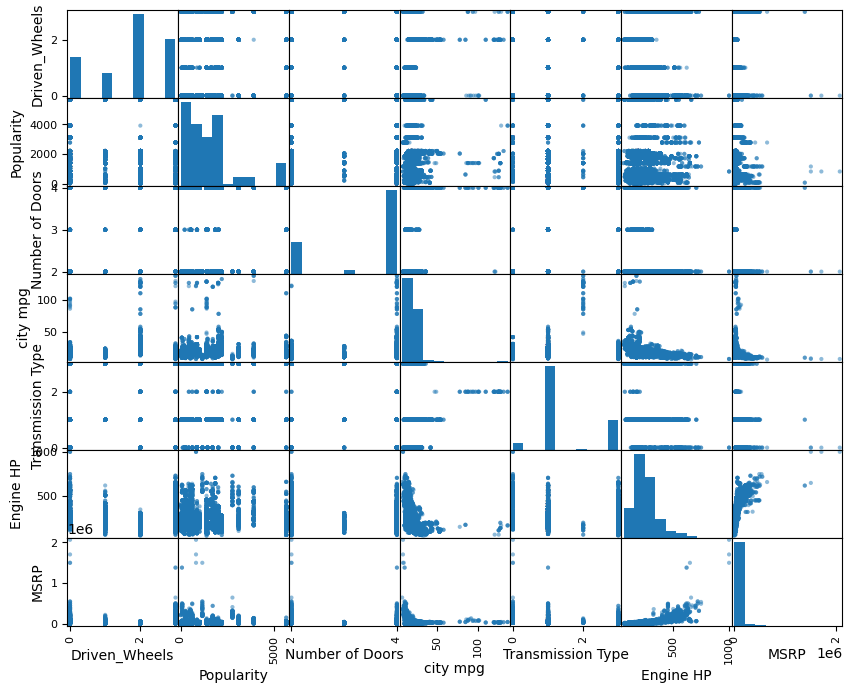

In [21]:
# show other corrilation over the MSRP
feature = ["Driven_Wheels", "Popularity", "Number of Doors", "city mpg", "Transmission Type", "Engine HP", "MSRP"]
scatter_matrix(cars_view[feature], figsize=(10,8))
plt.show()

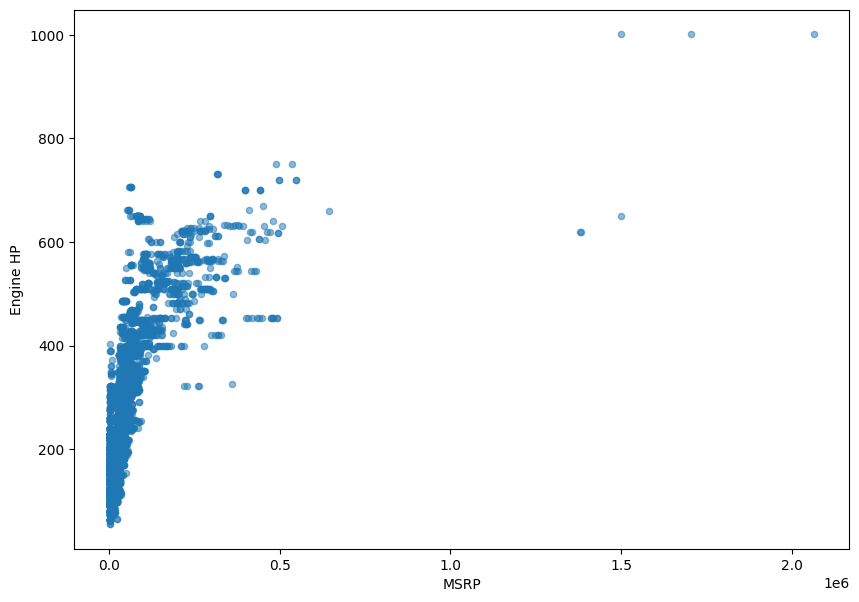

In [22]:
cars_view.plot(kind='scatter', x="MSRP", y="Engine HP", figsize=(10,7), alpha=0.5)
plt.show()

In [23]:
cars[cars_view["Engine HP"] > 800]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769


In [24]:
cars[cars_view["MSRP"] > 1000000]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6350,Maybach,Landaulet,2011,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Convertible,16,10,67,1380000
6351,Maybach,Landaulet,2012,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,Performance",Large,Convertible,16,10,67,1382750
8486,Lamborghini,Reventon,2008,premium unleaded (required),650.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,1158,1500000
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769


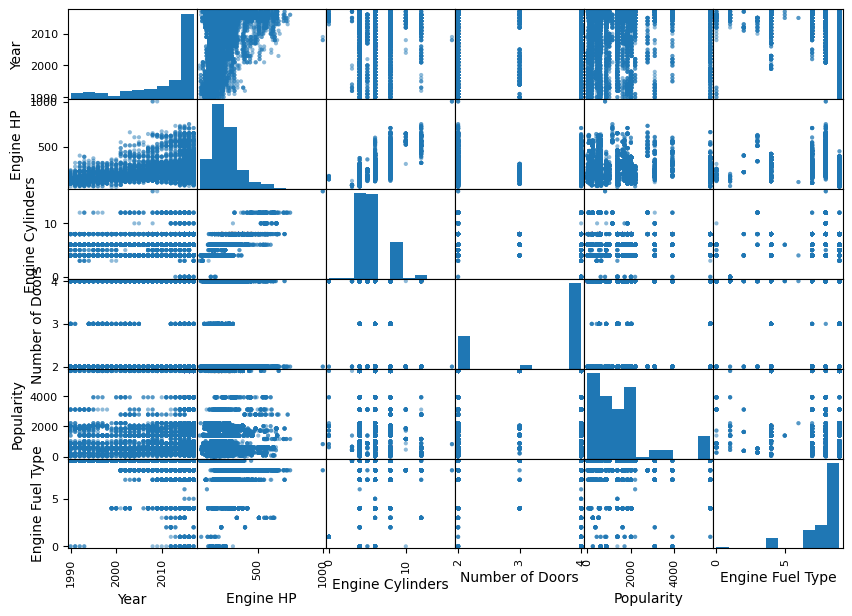

In [25]:
# Show ratio of columns with blank values to the remaining columns
feature = ["Year", "Engine HP", "Engine Cylinders", "Number of Doors", "Popularity", "Engine Fuel Type"]
scatter_matrix(cars_view[feature], figsize=(10,7))
plt.show()

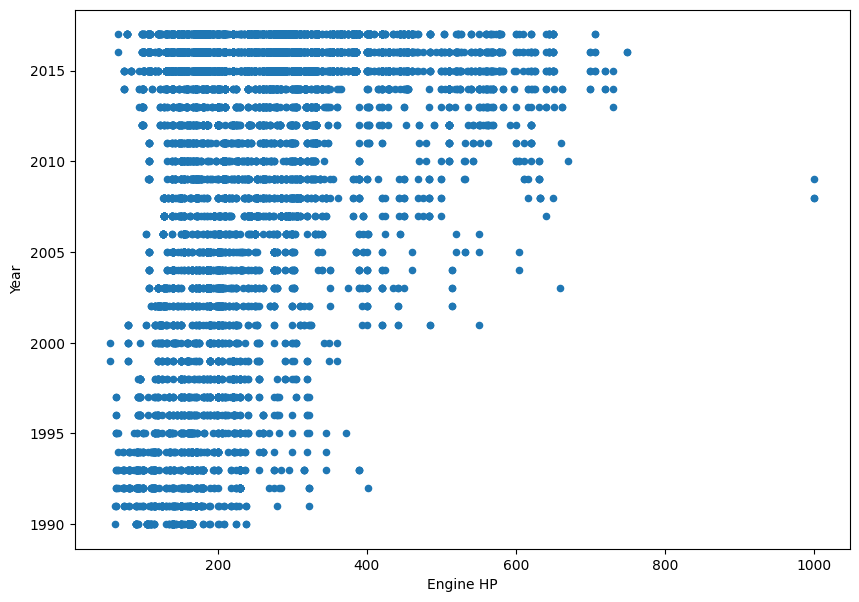

In [26]:
cars_view.plot(kind='scatter', x="Engine HP", y="Year", figsize=(10,7))
plt.show()

# Preprocessing
1. Removing model and Market Category column because to high number of objects
2. missing value in Engine Fuel Type, Engine HP, Engine Cylinders, Number of Doors, Transmission Type

### Tip
Presence of unknown in Transmission Type

# Pre Processing

In [27]:
# pre processing 
df = train.copy()

# label column set rows on other column
df_y_upp = df[df["Year"] >= 2010].copy()
df_y_low = df[df["Year"] < 2010].copy()
df_y = pd.concat([df_y_upp, df_y_low], axis=0)
df_y.reset_index(drop=True, inplace=True)
df_y = df_y["MSRP"].copy()

df.drop("MSRP", axis=1, inplace=True)

# Extracting numeric values from a string
df_num = df[["Year", "Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg", "Popularity"]].copy()

df_cat = df[["Year", "Engine Fuel Type", "Transmission Type", "Driven_Wheels", "Vehicle Size", "Vehicle Style"]].copy()

# Engine HP missing value fix over year
imputer = SimpleImputer(missing_values=np.nan, strategy='median')  
 
df_hp_imputed_upp = imputer.fit_transform(df_num[df_num["Year"] >= 2010][["Engine HP"]])
df_hp_imputed_upp = pd.DataFrame(df_hp_imputed_upp)
df_hp_imputed_low = imputer.fit_transform(df_num[df_num["Year"] < 2010][["Engine HP"]])
df_hp_imputed_low = pd.DataFrame(df_hp_imputed_low)
df_hp_imputed = pd.concat([df_hp_imputed_upp, df_hp_imputed_low], axis=0)
df_hp_imputed.reset_index(drop=True, inplace=True)
df_hp_imputed.columns = ["Engine HP"]

# set all rows in Engin HP
df_num_upp = df_num[df_num['Year'] >= 2010].copy()
df_num_low = df_num[df_num['Year'] < 2010].copy()
df_num = pd.concat([df_num_upp, df_num_low], axis=0)
df_num.reset_index(drop=True, inplace=True)

# concatinate Engin Hp to numeric values
df_num.drop("Engine HP", axis=1, inplace=True)
df_num = pd.concat([df_num, df_hp_imputed], axis=1)

# missing fix all numeric
df_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

# category fix
# fix rows to numerical values
df_cat_upp = df_cat[df_cat["Year"] >= 2010].copy()
df_cat_low = df_cat[df_cat["Year"] < 2010].copy()
df_cat = pd.concat([df_cat_upp, df_cat_low], axis=0)
df_cat.reset_index(drop=True, inplace=True)

# new columns value fix
new_transmision = []
new_fuel = []

# fix Transmission Unknown Value
for t, y in zip(df_cat["Transmission Type"], df_cat["Year"]):
    if t == "UNKNOWN":
        if y >= 2000:
            new_transmision.append("AUTOMATIC")
        else:
            new_transmision.append("MANUAL")
    else:
        new_transmision.append(t)
    
# fix missing value in Engin Fuel Type    
for f in df_cat["Engine Fuel Type"]:
    if pd.isnull(f):
        new_fuel.append("regular unleaded")
    else:
        new_fuel.append(f)
        
        
df_cat.drop("Year", axis=1, inplace=True)

# add Transmission column value fix
df_cat.drop("Transmission Type", axis=1, inplace=True)
df_cat.insert(2, "Transmission Type", new_transmision)

# add Engine Fuel Type column value fix
df_cat.drop("Engine Fuel Type", axis=1, inplace=True)
df_cat.insert(1, "Engine Fuel Type", new_fuel)

# encode object value 
encoder = OrdinalEncoder(handle_unknown='error')
df_encode = pd.DataFrame(encoder.fit_transform(df_cat), columns=df_cat.columns)

# concat numeric value and category value
df_prepared = pd.concat([df_imputed, df_encode], axis=1)

# standard scaler
scaler = StandardScaler()
df_prepared = pd.DataFrame(scaler.fit_transform(df_prepared), columns=df_prepared.columns)
df_prepared.head()

,Year,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Engine HP,Driven_Wheels,Engine Fuel Type,Transmission Type,Vehicle Size,Vehicle Style
0,0.870326,-0.917060,-1.638018,-0.071656,0.029210,0.100990,0.917926,1.145638,-0.000586,1.685530,-1.110743,-0.067906
1,0.738570,0.202871,-1.638018,-0.403188,-0.304074,2.814327,0.295421,-0.729847,-2.234136,-0.487002,0.036098,0.951331
2,0.738570,-0.917060,0.637610,0.480897,0.251400,-0.478572,-0.455247,0.207895,-0.558974,-1.573268,1.182940,1.155178
3,0.738570,0.202871,0.637610,0.149365,-0.081884,0.038353,0.780609,-1.667590,0.557802,-0.487002,0.036098,1.155178
4,0.870326,-0.917060,0.637610,1.364981,2.251104,0.318497,-0.455247,0.207895,0.557802,-0.487002,1.182940,1.155178


# Pre Processing With Pipeline

In [28]:
# Attribute Selectortegy
class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attr_name = attributes
        
    def fit(self, df):
        return self
    
    # return values for next process in pipeline
    def transform(self, df):
        return df[self.attr_name].values

# hourse power missing value fix over year
class EnginHpFix(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def transform(self, df):
        year_ix, hp_ix = 0, 1        # Engine HP missing value fix over year
        df = pd.DataFrame(df)
        imputer = SimpleImputer(missing_values=np.nan, strategy='median')  
        
        df_hp_imputed_upp = imputer.fit_transform(df[df[year_ix] >= 2010][[hp_ix]])
        df_hp_imputed_upp = pd.DataFrame(df_hp_imputed_upp)
        df_hp_imputed_low = imputer.fit_transform(df[df[year_ix] < 2010][[hp_ix]])
        df_hp_imputed_low = pd.DataFrame(df_hp_imputed_low)
        df_hp_imputed = pd.concat([df_hp_imputed_upp, df_hp_imputed_low], axis=0)
        df_hp_imputed.reset_index(drop=True, inplace=True)

        # set all rows in Engin HP
        df_num_upp = df[df[year_ix] >= 2010].copy()
        df_num_low = df[df[year_ix] < 2010].copy()
        df_num = pd.concat([df_num_upp, df_num_low], axis=0)
        df_num.reset_index(drop=True, inplace=True)

        # concatinate Engin Hp to numeric values
        df_num.drop(hp_ix, axis=1, inplace=True)
        df_num = pd.concat([df_num, df_hp_imputed], axis=1)
        
        return df_num.values
    
# Category value fix
class CategoryValueFix(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def transform(self, df):
        year_ix, fuel_ix, trans_ix = 0, 1, 2     # index column number
        
        # set rows in numeric values
        df = pd.DataFrame(df)

        # save fix value
        new_transmision = []
        new_fuel = []
        
        # fix Transmission Unknown Value
        for t, y in zip(df[trans_ix], df[year_ix]):
            if t == "UNKNOWN":
                if y >= 2000:
                    new_transmision.append("AUTOMATIC")
                else:
                    new_transmision.append("MANUAL")
            else:
                new_transmision.append(t)
            
        # fix missing value in Engin Fuel Type    
        for f in df[fuel_ix]:
            if pd.isnull(f):
                new_fuel.append("regular unleaded")
            else:
                new_fuel.append(f)
                
        df_upp = df[df[year_ix] >= 2010].copy()
        df_low = df[df[year_ix] < 2010].copy()
        
        df = pd.concat([df_upp, df_low], axis=0)
        df.reset_index(drop=True, inplace=True)
        
        df.drop([year_ix, fuel_ix, trans_ix], axis=1, inplace=True)

        # add Engine Fuel Type column value fix
        df.insert(0, 0, new_fuel)

        # add Transmission column value fix
        df.insert(1, 1, new_transmision)
        
        return df.values

# for set y rows on other columns
def y_set(df):
    df_y_upp = df[df["Year"] >= 2010].copy()
    df_y_low = df[df["Year"] < 2010].copy()

    df_y = pd.concat([df_y_upp, df_y_low], axis=0)
    df_y.reset_index(drop=True, inplace=True)
    return df_y["MSRP"]
        
# create df and y column
df = train.copy()
df_y = y_set(df)
     
attr_num = ["Year", "Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg", "Popularity"]
attr_cat = ["Year", "Engine Fuel Type", "Transmission Type", "Driven_Wheels", "Vehicle Size", "Vehicle Style"]

# number preprocess
num_pipeline = Pipeline([
    ("Attribute-selector", AttributeSelector(attributes=attr_num)),
    ("EnginHp-fix", EnginHpFix()),
    ("Simple-Imputer", SimpleImputer(missing_values=np.nan, strategy='median')),
    ("Standard-scaler", StandardScaler())
])

# category preprocess
cat_pipeline = Pipeline([
    ("Attribute-selector", AttributeSelector(attributes=attr_cat)),
    ("value_fix", CategoryValueFix()),
    ("Ordinal-Encoder", OrdinalEncoder(handle_unknown='error')),
    ("Standard-scaler", StandardScaler())
])

final_pipeline = FeatureUnion(transformer_list=[
    ("number_operation", num_pipeline),
    ("category_operation", cat_pipeline)
])

df_prepared_tmp = final_pipeline.fit_transform(df)
df_prepared = pd.DataFrame(df_prepared_tmp)

df_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.870326,-0.917060,-1.638018,-0.071656,0.029210,0.100990,0.917926,-0.000586,1.685530,1.145638,-1.110743,-0.067906
1,0.738570,0.202871,-1.638018,-0.403188,-0.304074,2.814327,0.295421,0.557802,-0.487002,-0.729847,0.036098,0.951331
2,0.738570,-0.917060,0.637610,0.480897,0.251400,-0.478572,-0.455247,-2.234136,-0.487002,0.207895,1.182940,1.155178
3,0.738570,0.202871,0.637610,0.149365,-0.081884,0.038353,0.780609,-2.234136,-0.487002,-1.667590,0.036098,1.155178
4,0.870326,-0.917060,0.637610,1.364981,2.251104,0.318497,-0.455247,-0.558974,-1.573268,0.207895,1.182940,1.155178


# test models

In [29]:
# for better show result in models
def display_score(score, model):
    print("===================", model, "===================")
    print("Your error = ", score)
    print("mean = ", score.mean())
    print("standard deviation = ", score.std())

In [30]:
# Dicision Tree
dec_tree = DecisionTreeRegressor()
dec_tree.fit(df_prepared, df_y)

dec_predict = dec_tree.predict(df_prepared)
mse = mean_squared_error(dec_predict, df_y)
rmse = np.sqrt(mse)
rmse

np.float64(1652.585447362653)

In [31]:
# Random Forest Regresion
rand_forest = RandomForestRegressor()

score = cross_val_score(rand_forest, df_prepared, df_y, scoring='neg_mean_squared_error', cv=10)
score_rmse = np.sqrt(-score)

display_score(score_rmse, "Random Forest Regressor")

=================== Random Forest Regressor ===================
Your error =  [ 6556.57207736  8938.4597286  19959.30967407  8117.41198272
 16876.42775978 15559.97546058  6473.52359187 23571.63384924
 38964.86824859  8948.56732178]
mean =  15396.674969459262
standard deviation =  9692.099945628406


In [32]:
# Decision Tree On cross validation
dec_reg = DecisionTreeRegressor()

score = cross_val_score(dec_reg, df_prepared, df_y, scoring='neg_mean_squared_error', cv=10)
score_rmse = np.sqrt(-score)

display_score(score_rmse, "Decision Tree Regressor")

=================== Decision Tree Regressor ===================
Your error =  [ 7828.83733958 13137.78666141 14769.86210005 40951.02567004
 11109.01635547 31191.08903034 10067.51541433 19361.9429186
 40902.7607976   9792.12579454]
mean =  19911.19620819625
standard deviation =  12271.6162987913


In [33]:
# XGboost Regression model 
xgb = XGBRegressor()

score = cross_val_score(xgb, df_prepared, df_y, scoring='neg_mean_squared_error', cv=10)
rmse_score = np.sqrt(-score)

display_score(rmse_score, "XGB Regressor")

=================== XGB Regressor ===================
Your error =  [ 6595.10181877  9244.30592311  9356.47540477  7187.73483095
 16921.91383975 10423.80774957  6522.8932231  18147.46351422
 36820.51602028  6880.40929015]
mean =  12810.06216146768
standard deviation =  8928.374623599417


In [34]:
# search best parametrs for xgboost regressor
xbg = XGBRegressor()

params = {"n_estimators": [200, 300, 400, 500], "max_depth": [3, 5, 7, 9]}
xgb_gd_search = GridSearchCV(xgb, params, scoring='neg_mean_squared_error', cv=10)
xgb_gd_search.fit(df_prepared, df_y)

print("best params", xgb_gd_search.best_params_)
print("Best Estimator = ", xgb_gd_search.best_estimator_)

best params {'max_depth': 5, 'n_estimators': 400}
Best Estimator =  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)


In [35]:
# rand_forest = RandomForestRegressor()

# params = {"n_estimators": [100, 200, 300, 400], "max_features": [4, 6, 8, 12]}
# gd_search = GridSearchCV(rand_forest, params, scoring='neg_mean_squared_error', cv=10)
# gd_search.fit(df_prepared, df_y)

# print("best params", gd_search.best_params_)
# print("Best Estimator = ", gd_search.best_estimator_)

# test process 

In [36]:
model = RandomForestRegressor(n_estimators=200)
model.fit(df_prepared, df_y)

# create test df
test_df = test.copy()

test_y = y_set(test_df)

# preprocessing test df
test_prepared = final_pipeline.fit_transform(test_df)
# predict values
test_predict = model.predict(test_prepared)
# mean score
mse_test = mean_squared_error(test_y, test_predict)
rmse_test = np.sqrt(mse_test)
rmse_test

np.float64(10393.754665992112)

# final class for py file

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestRegressor
from pathlib import Path


# Attribute Selectortegy
class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attr_name = attributes
        
    def fit(self, df):
        return self
    
    # return values for next process in pipeline
    def transform(self, df):
        return df[self.attr_name].values

# hourse power missing value fix over year
class EnginHpFix(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def transform(self, df):
        year_ix, hp_ix = 0, 1        # Engine HP missing value fix over year
        df = pd.DataFrame(df)
        imputer = SimpleImputer(missing_values=np.nan, strategy='median')  
        
        df_hp_imputed_upp = imputer.fit_transform(df[df[year_ix] >= 2010][[hp_ix]])
        df_hp_imputed_upp = pd.DataFrame(df_hp_imputed_upp)
        df_hp_imputed_low = imputer.fit_transform(df[df[year_ix] < 2010][[hp_ix]])
        df_hp_imputed_low = pd.DataFrame(df_hp_imputed_low)
        df_hp_imputed = pd.concat([df_hp_imputed_upp, df_hp_imputed_low], axis=0)
        df_hp_imputed.reset_index(drop=True, inplace=True)

        # set all rows in Engin HP
        df_num_upp = df[df[year_ix] >= 2010].copy()
        df_num_low = df[df[year_ix] < 2010].copy()
        df_num = pd.concat([df_num_upp, df_num_low], axis=0)
        df_num.reset_index(drop=True, inplace=True)

        # concatinate Engin Hp to numeric values
        df_num.drop(hp_ix, axis=1, inplace=True)
        df_num = pd.concat([df_num, df_hp_imputed], axis=1)
        
        return df_num.values
    
# Category value fix
class CategoryValueFix(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def transform(self, df):
        year_ix, fuel_ix, trans_ix = 0, 1, 2     # index column number
        
        # set rows in numeric values
        df = pd.DataFrame(df)

        # save fix value
        new_transmision = []
        new_fuel = []
        
        # fix Transmission Unknown Value
        for t, y in zip(df[trans_ix], df[year_ix]):
            if t == "UNKNOWN":
                if y >= 2000:
                    new_transmision.append("AUTOMATIC")
                else:
                    new_transmision.append("MANUAL")
            else:
                new_transmision.append(t)
            
        # fix missing value in Engin Fuel Type    
        for f in df[fuel_ix]:
            if pd.isnull(f):
                new_fuel.append("regular unleaded")
            else:
                new_fuel.append(f)
                
        df_upp = df[df[year_ix] >= 2010].copy()
        df_low = df[df[year_ix] < 2010].copy()
        
        df = pd.concat([df_upp, df_low], axis=0)
        df.reset_index(drop=True, inplace=True)
        
        df.drop([year_ix, fuel_ix, trans_ix], axis=1, inplace=True)

        # add Engine Fuel Type column value fix
        df.insert(0, 0, new_fuel)

        # add Transmission column value fix
        df.insert(1, 1, new_transmision)
        
        return df.values

class DataMining(TransformerMixin, BaseEstimator):
    __model = None
    __base_value = None
    __base_cars = None
    
    # for set y rows on other columns
    def y_set(self, df):
        df_y_upp = df[df["Year"] >= 2010].copy()
        df_y_low = df[df["Year"] < 2010].copy()

        df_y = pd.concat([df_y_upp, df_y_low], axis=0)
        df_y.reset_index(drop=True, inplace=True)
        return df_y["MSRP"]
    
    # preproccessing operation
    def preprocessing(self, df):
        attr_num = ["Year", "Engine HP", "Engine Cylinders", "Number of Doors", "highway MPG", "city mpg", "Popularity"]
        attr_cat = ["Year", "Engine Fuel Type", "Transmission Type", "Driven_Wheels", "Vehicle Size", "Vehicle Style"]

        # number preprocess
        num_pipeline = Pipeline([
            ("Attribute-selector", AttributeSelector(attributes=attr_num)),
            ("EnginHp-fix", EnginHpFix()),
            ("Simple-Imputer", SimpleImputer(missing_values=np.nan, strategy='median')),
            ("Standard-scaler", StandardScaler())
        ])

        # category preprocess
        cat_pipeline = Pipeline([
            ("Attribute-selector", AttributeSelector(attributes=attr_cat)),
            ("value_fix", CategoryValueFix()),
            ("Ordinal-Encoder", OrdinalEncoder(handle_unknown='error')),
            ("Standard-scaler", StandardScaler())
        ])

        final_pipeline = FeatureUnion(transformer_list=[
            ("number_operation", num_pipeline),
            ("category_operation", cat_pipeline)
        ])
        
        df_prepared = final_pipeline.fit_transform(df)
        df_prepared = pd.DataFrame(df_prepared)
        
        return df_prepared
    
    def fit(self, df):
        global cars
        cars = pd.read_csv('D:/Code File\Project/Car_F_and_P/Car F and P.csv')
        train, te = train_test_split(cars, train_size=0.8, random_state=2)
        
        # preproccessing firs data and new data 
        cars_prepared = self.preprocessing(train)
        
        # set y first data for learn michin
        cars_y = self.y_set(train)
        
        # learn model
        rand_forest = RandomForestRegressor(n_estimators=200)
        rand_forest.fit(cars_prepared, cars_y)
        
        self.__model = rand_forest     # save model for use in transform
        
        return self
        
    # use new data frame and result
    def transform(self, df):
        # Both for small data and for accurate prediction
        base = cars
        base["find"] = False
        df["find"] = True
        
        df = pd.concat([base, df], axis=0)
        
        # set base value in price predict
        value_upp = df[df["Year"] >= 2010].copy()
        value_low = df[df["Year"] < 2010].copy()

        df_set = pd.concat([value_upp, value_low], axis=0)
        df_set.reset_index(drop=True, inplace=True)
        find_ix = df_set[df_set["find"] == True].index
        
        # save value 
        df_set.drop("find", axis=1, inplace=True)
        self.__base_value = df_set.loc[find_ix]
        self.__base_value.reset_index(drop=True, inplace=True)

        df_x = self.preprocessing(df)
        df_x = df_x.loc[find_ix]
        
        model = self.__model
        
        # predict price
        df_y = model.predict(df_x)
        df_y = pd.DataFrame(df_y, columns=["Price"])
        
        # final data frame
        df_predicted = pd.concat([self.__base_value, df_y], axis=1)
        
        return df_predicted
    
    
testes = pd.read_csv("Car F and P Test.csv")
testes = testes[3000:3001]
dm = DataMining()
t_pred = dm.fit_transform(testes)
t_pred.head()

<>:149: SyntaxWarning: invalid escape sequence '\C'
<>:149: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Ernestsalman\AppData\Local\Temp\ipykernel_7052\4202130589.py:149: SyntaxWarning: invalid escape sequence '\C'
  cars = pd.read_csv('D:\Code File\Project\Car_F_and_P\Car F and P.csv')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Price
0,Chevrolet,Corvette,2016,premium unleaded (recommended),460.0,8.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,29,17,1385,NaN,62905.25
